In [49]:
states_df = pd.read_csv('./states_abbreviations.csv')
for state, state_abbreviation in zip(states_df['State'], states_df['Abbreviation']):
    print(f'state is {state}')
    print(f'state_abbreviation is {state_abbreviation}')

state is Alabama
state_abbreviation is AL
state is Alaska
state_abbreviation is AK
state is Arizona
state_abbreviation is AZ
state is Arkansas
state_abbreviation is AR
state is California
state_abbreviation is CA
state is Colorado
state_abbreviation is CO
state is Connecticut
state_abbreviation is CT
state is Delaware
state_abbreviation is DE
state is District of Columbia
state_abbreviation is DC
state is Florida
state_abbreviation is FL
state is Georgia
state_abbreviation is GA
state is Hawaii
state_abbreviation is HI
state is Idaho
state_abbreviation is ID
state is Illinois
state_abbreviation is IL
state is Indiana
state_abbreviation is IN
state is Iowa
state_abbreviation is IA
state is Kansas
state_abbreviation is KS
state is Kentucky
state_abbreviation is KY
state is Louisiana
state_abbreviation is LA
state is Maine
state_abbreviation is ME
state is Montana
state_abbreviation is MT
state is Nebraska
state_abbreviation is NE
state is Nevada
state_abbreviation is NV
state is New Hamp

In [61]:
import pandas as pd
import numpy as np
import pdb

def get_scatter_df(
    state_abbreviation, 
    csv_file_path='./openelections-data-mi/2016/20161108__mi__general__precinct.csv'
):
    state = state_abbreviation.lower()
    print(f'processing {state}')
    df = pd.read_csv(csv_file_path)
    precincts = df['precinct'].unique()
    dem_diff = []
    rep_diff = []
    dem_party = []
    rep_party = []
    rep_party_percent_list = []
    dem_party_percent_list = []

    for precinct in precincts:
        if precinct == '9999':
            # need to investigate this precinct, strange
            continue
        df_per_precinct = df[
            (df['precinct'] == precinct)
        ]

        rep_president_votes = df_per_precinct[
            (df_per_precinct['party'] == 'REP')
            & 
            (df_per_precinct['office']=='President')
        ]['votes'].values[0]

        dem_president_votes = df_per_precinct[
            (df_per_precinct['party'] == 'DEM')
            & 
            (df_per_precinct['office']=='President')
        ]['votes'].values[0]

        rep_party_vote_list = df_per_precinct[
            (df_per_precinct['office']!='President') & (df_per_precinct['party']=='REP')
        ]['votes'].tolist()
        dem_party_vote_list = df_per_precinct[
            (df_per_precinct['office']!='President') & (df_per_precinct['party']=='DEM')
        ]['votes'].tolist()

        rep_party_votes = sum(rep_party_vote_list)/len(rep_party_vote_list)
        dem_party_votes = sum(dem_party_vote_list)/len(dem_party_vote_list)
        dem_party.append(dem_party_votes)
        rep_party.append(rep_party_votes)
        if rep_party_votes + dem_party_votes == 0:
            rep_party_percent = 0
            dem_party_percent = 0
            # pdb.set_trace()
            print(f'precinct {precinct} got zero party vote on both sides')
        else:
            total_party_votes = (dem_party_votes+rep_party_votes)
            rep_party_percent = float(rep_party_votes)/total_party_votes
            dem_party_percent = float(dem_party_votes)/total_party_votes


        rep_party_percent_list.append(rep_party_percent)
        dem_party_percent_list.append(dem_party_percent)
        totoal_president_votes = dem_president_votes + rep_president_votes
        if totoal_president_votes == 0:
            print(f'precinct {precinct} got zero presidential vote on both sides')
#             pdb.set_trace()
            dem_president_percentage = 0
            rep_president_percentage = 0
        else:
            dem_president_percentage = float(dem_president_votes)/totoal_president_votes
            rep_president_percentage = float(rep_president_votes)/totoal_president_votes
            
        dem_diff.append(dem_president_votes - dem_party_votes)
        rep_diff.append(rep_president_votes - rep_party_votes)


    d = {
        'rep_diff': rep_diff, 
        'dem_diff': dem_diff,
        'rep_party': rep_party, 
        'dem_party': dem_party,
        'rep_party_percent': rep_party_percent_list,
        'dem_party_percent': dem_party_percent_list,
    }
    df_scatter = pd.DataFrame(data=d)
    return d, df_scatter


processing pa
precinct WHITEHALL District 1 B (Cong 18) got zero presidential vote on both sides
0.0
precinct CUMRU District 1 B (Cong 16) got zero party vote on both sides
precinct CUMRU District 1 B (Cong 16) got zero presidential vote on both sides
precinct BARR B (SOUTH Cong 12) got zero presidential vote on both sides
0.0
precinct NORTHERN CAMBRIA Ward 3 B (Cong 12) got zero party vote on both sides
precinct NORTHERN CAMBRIA Ward 3 B (Cong 12) got zero presidential vote on both sides
precinct FERGUSON NORTHEAST 1B got zero presidential vote on both sides
0.0
precinct KENNETT Precinct 2 B (Cong 16) got zero party vote on both sides
precinct KENNETT Precinct 2 B (Cong 16) got zero presidential vote on both sides
precinct PHOENIXVILLE Ward MIDDLE-1 (STH 155) got zero presidential vote on both sides
precinct PINEY Precinct B (Cong 5) got zero presidential vote on both sides
precinct NORTH LEBANON EAST B (Cong 15) got zero presidential vote on both sides
0.0
precinct BRYN ATHYN INDEPEN

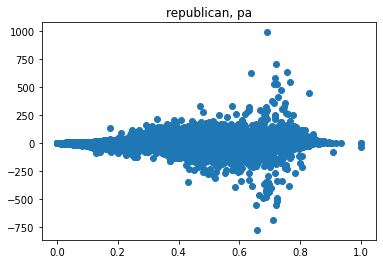

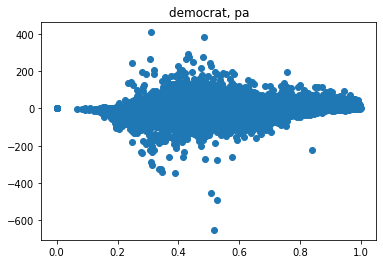

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt
import pdb
%matplotlib inline


states_df = pd.read_csv('./states_abbreviations.csv')
fig_counter = 1
csv_file_path_dict = {
#     'mi': './openelections-data-mi/2016/20161108__mi__general__precinct.csv',
    'pa': './openelections-data-pa/2016/20161108__pa__general__precinct.csv',
}
# state_name, state_abbreviation in zip(states_df['State'], states_df['Abbreviation'])
for state_abbreviation in csv_file_path_dict:
    d, df_scatter = get_scatter_df(
        state_abbreviation, 
        csv_file_path_dict[state_abbreviation]
    )
#     pdb.set_trace()

    plt.figure(fig_counter)
    plt.title(f'republican, {state_abbreviation}')
    plt.scatter(df_scatter['rep_party_percent'], df_scatter['rep_diff'])
    plt.show()
    fig_counter +=1
    plt.figure(fig_counter)
    plt.title(f'democrat, {state_abbreviation}')
    plt.scatter(df_scatter['dem_party_percent'], df_scatter['dem_diff'])
    plt.show()
    fig_counter +=1